In [31]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [32]:
import os

In [36]:
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/CNN'

In [34]:
os.chdir('/content/drive/My Drive/Colab Notebooks/CNN')

In [35]:
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/CNN'

# CNN Image Classifiation

In [45]:
import zipfile
import random
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import activations
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [ ]:
local_zip = './CNN_assignment-20200702T094027Z-001.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')
zip_ref.close()

In [38]:
batch_size = 32
img_height = 180
img_width = 180

In [39]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
"CNN_assignment/Dataset/train",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 440 files belonging to 4 classes.
Using 352 files for training.


In [40]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
"CNN_assignment/Dataset/train",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 440 files belonging to 4 classes.
Using 88 files for validation.


In [41]:
class_names = train_ds.class_names
print(class_names)

['category 1', 'category 2', 'category 3', 'category 4']


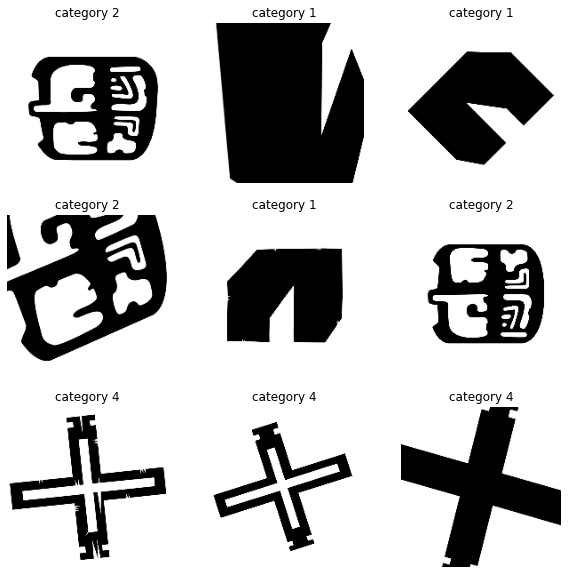

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [43]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [44]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [65]:
import numpy as np
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


In [66]:
model = tf.keras.models.Sequential([
   layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(4,activation=activations.softmax) 
])

model.compile(optimizer=optimizers.Adamax(learning_rate=0.001), loss=losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 22, 22, 64)       

In [68]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

Epoch 1/10
11/11 [==============================] - 1s 61ms/step - loss: 1.5362 - accuracy: 0.3977 - val_loss: 0.7924 - val_accuracy: 0.7273
Epoch 2/10
11/11 [==============================] - 0s 40ms/step - loss: 0.6689 - accuracy: 0.8097 - val_loss: 0.5207 - val_accuracy: 0.8523
Epoch 3/10
11/11 [==============================] - 0s 40ms/step - loss: 0.3965 - accuracy: 0.8892 - val_loss: 0.4012 - val_accuracy: 0.8523
Epoch 4/10
11/11 [==============================] - 0s 40ms/step - loss: 0.2447 - accuracy: 0.9489 - val_loss: 0.3152 - val_accuracy: 0.9205
Epoch 5/10
11/11 [==============================] - 0s 40ms/step - loss: 0.1555 - accuracy: 0.9744 - val_loss: 0.2373 - val_accuracy: 0.9091
Epoch 6/10
11/11 [==============================] - 0s 41ms/step - loss: 0.0919 - accuracy: 0.9915 - val_loss: 0.2495 - val_accuracy: 0.9205
Epoch 7/10
11/11 [==============================] - 0s 40ms/step - loss: 0.0516 - accuracy: 0.9972 - val_loss: 0.2643 - val_accuracy: 0.9091
Epoch 8/10
11

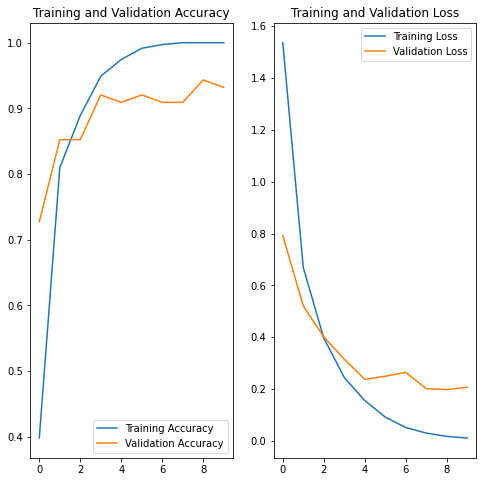

In [69]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

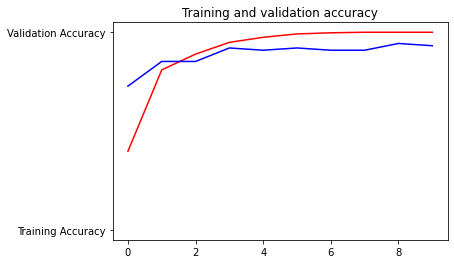

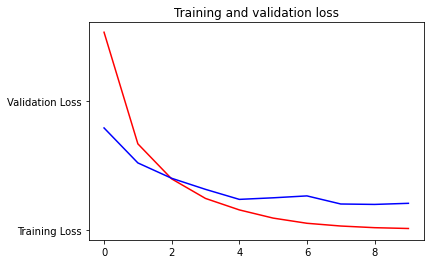

In [70]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [73]:
data_augmentation = Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
  ]
)

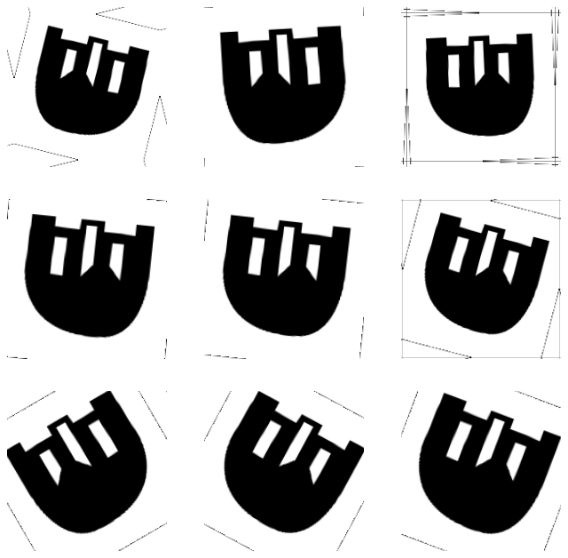

In [74]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [75]:
model = tf.keras.models.Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(4,activation=activations.softmax) 
])

model.compile(optimizer=optimizers.Adamax(learning_rate=0.001), loss=losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [76]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_8 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_5 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 45, 45, 64)       

In [78]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

Epoch 1/20
11/11 [==============================] - 1s 57ms/step - loss: 0.1353 - accuracy: 0.9688 - val_loss: 0.3862 - val_accuracy: 0.8864
Epoch 2/20
11/11 [==============================] - 1s 49ms/step - loss: 0.0991 - accuracy: 0.9688 - val_loss: 0.3022 - val_accuracy: 0.8750
Epoch 3/20
11/11 [==============================] - 1s 50ms/step - loss: 0.0873 - accuracy: 0.9744 - val_loss: 0.2611 - val_accuracy: 0.8864
Epoch 4/20
11/11 [==============================] - 1s 49ms/step - loss: 0.0848 - accuracy: 0.9744 - val_loss: 0.2507 - val_accuracy: 0.8977
Epoch 5/20
11/11 [==============================] - 1s 48ms/step - loss: 0.0736 - accuracy: 0.9716 - val_loss: 0.2560 - val_accuracy: 0.8864
Epoch 6/20
11/11 [==============================] - 1s 49ms/step - loss: 0.0682 - accuracy: 0.9830 - val_loss: 0.2189 - val_accuracy: 0.9091
Epoch 7/20
11/11 [==============================] - 1s 48ms/step - loss: 0.0750 - accuracy: 0.9830 - val_loss: 0.2126 - val_accuracy: 0.9091
Epoch 8/20
11

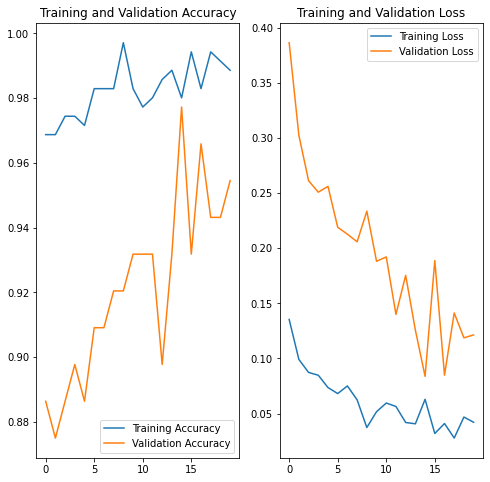

In [79]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()